In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

# Develop a kinetic model for simple enzymatic reaction:
# S ==Enzyme==> P
# Plot 𝑆(𝑡), 𝑃(𝑡), 𝐸(𝑡), 𝐸𝑆(𝑡) for time ranged from 0 to
# 1) 1 s (pre-equilibrium stage),
# 2) 10000 s
#
#k1 = 500
#k2 = 6
#k3 = 1.5
#S0 = 0.1
#E0 = 0.00001

# https://en.wikipedia.org/wiki/Enzyme
# Simple enzymatic reaction
# E + S <-> ES, k1, k2
# ES -> E + P, k3

def model(y, t):
  E = y[0] # unpack variables
  S = y[1]
  ES = y[2]
  P = y[3]
  dEdt = -k1*E*S + k2*ES + k3*ES
  dSdt = -k1*E*S + k2*ES
  dESdt = k1*E*S - k2*ES - k3*ES
  dPdt = k3*ES
  return [dEdt, dSdt, dESdt, dPdt] # return derivatives

In [ ]:
k1 = 500
k2 = 6
k3 = 1.5
S0 = 0.1
E0 = 0.00001
ic = [E0, S0, 0, 0]

t = np.linspace(0,1)

results = odeint( model, ic, t)
E = results[:,0]
S = results[:,1]
ES = results[:,2]
P = results[:,3]


In [ ]:
print ("Substrate balance")
print (S + ES + P)
print ("Enzyme balance")
print (E + ES)

Substrate balance
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
Enzyme balance
[1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05
 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05
 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05
 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05
 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05 1.e-05]


In [ ]:
# plots here

In [ ]:
# Do computer simulations to prove the shape of the saturation curve
# initial enzymatic reaction rate vs. initial substrate concentration
# https://en.wikipedia.org/wiki/Enzyme

# hint 1: initial rate = [c(t2) - c(t1)] / [t2 - t1], if t2-t1 is sufficiently small
# hint 2: manual vs. automatic approach of the script
# hint 3: res_S0 = np.append(res_S0, S0)


In [ ]:
res_S0 = np.array([])
res_r0 = np.array([])


for S0 in np.linspace(0.0001,1):
  k1 = 500
  k2 = 6
  k3 = 1.5
  E0 = 0.00001
  ic = [E0, S0, 0, 0]

  t = np.linspace(0,10000)

  results = odeint( model, ic, t)
  E = results[:,0]
  S = results[:,1]
  ES = results[:,2]
  P = results[:,3]

  r0 = -(S[1]-S[0])/(t[1]-t[0])
  print("S0",S0,"initial rate", r0)

  res_S0 = np.append(res_S0, S0)
  res_r0 = np.append(res_r0, r0)



S0 0.0001 initial rate 9.017015047124541e-08
S0 0.02050612244897959 initial rate 8.525810187110091e-06
S0 0.04091224489795919 initial rate 1.092616885406946e-05
S0 0.06131836734693878 initial rate 1.2040449791459093e-05
S0 0.08172448979591837 initial rate 1.2681807221699399e-05
S0 0.10213061224489796 initial rate 1.3098166934300873e-05
S0 0.12253673469387756 initial rate 1.3390103118104058e-05
S0 0.14294285714285712 initial rate 1.3606119490746992e-05
S0 0.16334897959183672 initial rate 1.3772393287437986e-05
S0 0.18375510204081633 initial rate 1.3904302040328538e-05
S0 0.2041612244897959 initial rate 1.4011529531731484e-05
S0 0.2245673469387755 initial rate 1.410039595555162e-05
S0 0.2449734693877551 initial rate 1.417524405770765e-05
S0 0.2653795918367347 initial rate 1.4239147528731243e-05
S0 0.28578571428571425 initial rate 1.4294342868581238e-05
S0 0.30619183673469386 initial rate 1.4342440294768971e-05
S0 0.32659795918367346 initial rate 1.438483192561732e-05
S0 0.347004081632653

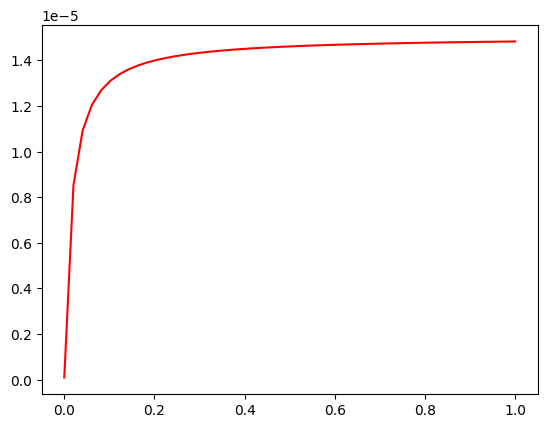

In [ ]:
plt.plot(res_S0, res_r0, 'r-')